### Finance Data Project

In this project we will focus on exploratory data analysis of stock prices of various banks.
We will focus on banks stock & see how they progressed throughout the financial crisis all the way to early 2016

### Get the data

We will use pandas to directly read data from yahoo finance.

### Importing libraries

In [29]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import cufflinks as cf
cf.go_offline()
%matplotlib inline
import pandas_datareader.data as web
import warnings
warnings.filterwarnings('ignore')

### Data

We need to get data using pandas datareader. We will get stock information for following banks -
- Bank of America
- CitiGroup
- Goldman Sachs
- JPMorgan Chase
- Morgan Stanley
- Wells Fargo

Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be separate dataframe, with the variable name for that bank being its ticker symbol. This will involve few steps:
1) Use datetime to set start & end datetime objects.
2) Figure out ticker symbol for each bank
3) Figure out how to use datareader to grab information on stock.

For example:
- Bank of America

BAC = web.DataReader("BAC", 'yahoo', start, end)

In [5]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

In [6]:
# Using pandas-datareader Importing data of various banks

# Bank of America
BAC = web.DataReader("BAC", 'yahoo', start, end)

# CitiGroup
C = web.DataReader("C", 'yahoo', start, end)

# Goldman Sachs
GS = web.DataReader("GS", 'yahoo', start, end)

# JPMorgan Chase
JPM = web.DataReader("JPM", 'yahoo', start, end)

# Morgan Stanley
MS = web.DataReader("MS", 'yahoo', start, end)

# Wells Fargo
WFC = web.DataReader("WFC", 'yahoo', start, end)

### Creating list of ticker symbols (as strings) in alphabetical order. Call this list : tickers

In [7]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

### Concatenating banks dataframes together to a single dataframe called bank_stocks

In [8]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC], axis = 1, keys = tickers)
bank_stocks.head()

BAC                                                          \
                 High        Low       Open      Close      Volume  Adj Close   
Date                                                                            
2006-01-03  47.180000  46.150002  46.919998  47.080002  16296700.0  33.777519   
2006-01-04  47.240002  46.450001  47.000000  46.580002  17757900.0  33.418774   
2006-01-05  46.830002  46.320000  46.580002  46.639999  14970700.0  33.461830   
2006-01-06  46.910000  46.349998  46.799999  46.570000  12599800.0  33.411621   
2006-01-09  46.970001  46.360001  46.720001  46.599998  15619400.0  33.433132   

                     C                                      ...         MS  \
                  High         Low        Open       Close  ...       Open   
Date                                                        ...              
2006-01-03  493.799988  481.100006  490.000000  492.899994  ...  57.169998   
2006-01-04  491.000000  483.500000  488.600006  483.799988  ...  58.700001   
2006-01-05  487.799988  484.000000  484.399994  486.200012  ...  58.549999   
2006-01-06  489.000000  482.000000  488.799988  486.200012  ...  58.770000   
2006-01-09  487.399994  483.000000  486.000000  483.899994  ...  58.630001   

                                                   WFC                        \
                Close     Volume  Adj Close       High        Low       Open   
Date                                                                           
2006-01-03  58.310001  5377000.0  33.464500  31.975000  31.195000  31.600000   
2006-01-04  58.349998  7977800.0  33.487461  31.820000  31.365000  31.799999   
2006-01-05  58.509998  5778000.0  33.579285  31.555000  31.309999  31.500000   
2006-01-06  58.570000  6889800.0  33.613728  31.775000  31.385000  31.580000   
2006-01-09  59.189999  4144500.0  33.969536  31.825001  31.555000  31.674999   

                                              
                Close      Volume  Adj Close  
Date                                          
2006-01-03  31.900000  11016400.0  20.353481  
2006-01-04  31.530001  10870000.0  20.117409  
2006-01-05  31.495001  10158000.0  20.095081  
2006-01-06  31.680000   8403800.0  20.213116  
2006-01-09  31.674999   5619600.0  20.209923  

[5 rows x 36 columns]

### Setting the column name levels

In [9]:
bank_stocks.columns.names = ['Bank Ticker', 'Stock Info']
bank_stocks = np.round(bank_stocks, decimals = 2)
bank_stocks.head()

Bank Ticker    BAC                                                 C         \
Stock Info    High    Low   Open  Close      Volume Adj Close   High    Low   
Date                                                                          
2006-01-03   47.18  46.15  46.92  47.08  16296700.0     33.78  493.8  481.1   
2006-01-04   47.24  46.45  47.00  46.58  17757900.0     33.42  491.0  483.5   
2006-01-05   46.83  46.32  46.58  46.64  14970700.0     33.46  487.8  484.0   
2006-01-06   46.91  46.35  46.80  46.57  12599800.0     33.41  489.0  482.0   
2006-01-09   46.97  46.36  46.72  46.60  15619400.0     33.43  487.4  483.0   

Bank Ticker                ...     MS                                WFC  \
Stock Info    Open  Close  ...   Open  Close     Volume Adj Close   High   
Date                       ...                                             
2006-01-03   490.0  492.9  ...  57.17  58.31  5377000.0     33.46  31.98   
2006-01-04   488.6  483.8  ...  58.70  58.35  7977800.0     33.49  31.82   
2006-01-05   484.4  486.2  ...  58.55  58.51  5778000.0     33.58  31.56   
2006-01-06   488.8  486.2  ...  58.77  58.57  6889800.0     33.61  31.77   
2006-01-09   486.0  483.9  ...  58.63  59.19  4144500.0     33.97  31.83   

Bank Ticker                                             
Stock Info     Low   Open  Close      Volume Adj Close  
Date                                                    
2006-01-03   31.19  31.60  31.90  11016400.0     20.35  
2006-01-04   31.36  31.80  31.53  10870000.0     20.12  
2006-01-05   31.31  31.50  31.50  10158000.0     20.10  
2006-01-06   31.39  31.58  31.68   8403800.0     20.21  
2006-01-09   31.56  31.67  31.67   5619600.0     20.21  

[5 rows x 36 columns]

### Exploratory Data Analysis

What is the max close price for each banks stock throughtout time period?

In [11]:
bank_stocks.xs('Close', axis = 1, level = 'Stock Info')

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,47.08,492.90,128.87,40.19,58.31,31.90
2006-01-04,46.58,483.80,127.09,39.62,58.35,31.53
2006-01-05,46.64,486.20,127.04,39.74,58.51,31.50
2006-01-06,46.57,486.20,128.84,40.02,58.57,31.68
2006-01-09,46.60,483.90,130.39,40.67,59.19,31.67
...,...,...,...,...,...,...
2015-12-24,17.27,52.71,182.47,66.60,32.48,54.82
2015-12-28,17.13,52.38,181.62,66.38,32.17,54.68
2015-12-29,17.28,52.98,183.53,67.07,32.55,55.29


In [12]:
bank_stocks.xs('Close', axis = 1, level = 'Stock Info').max()

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

Create a new empty dataframe called returns. This will contain returns for each banks stock. Returns are defined by
ri = (Pi/Pi-1)-1

In [13]:
returns = pd.DataFrame()

We can use pandas pct_change() method on close column to create a column representing this return value. Creating a for loop
that goes & for each bank stock ticker creating this returns column & sets it as a column in return dataframe.

In [14]:
tickers

['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [15]:
for tick in tickers:
    returns[tick + ' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()    

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000316


Creating a pairplot of returns dataframe

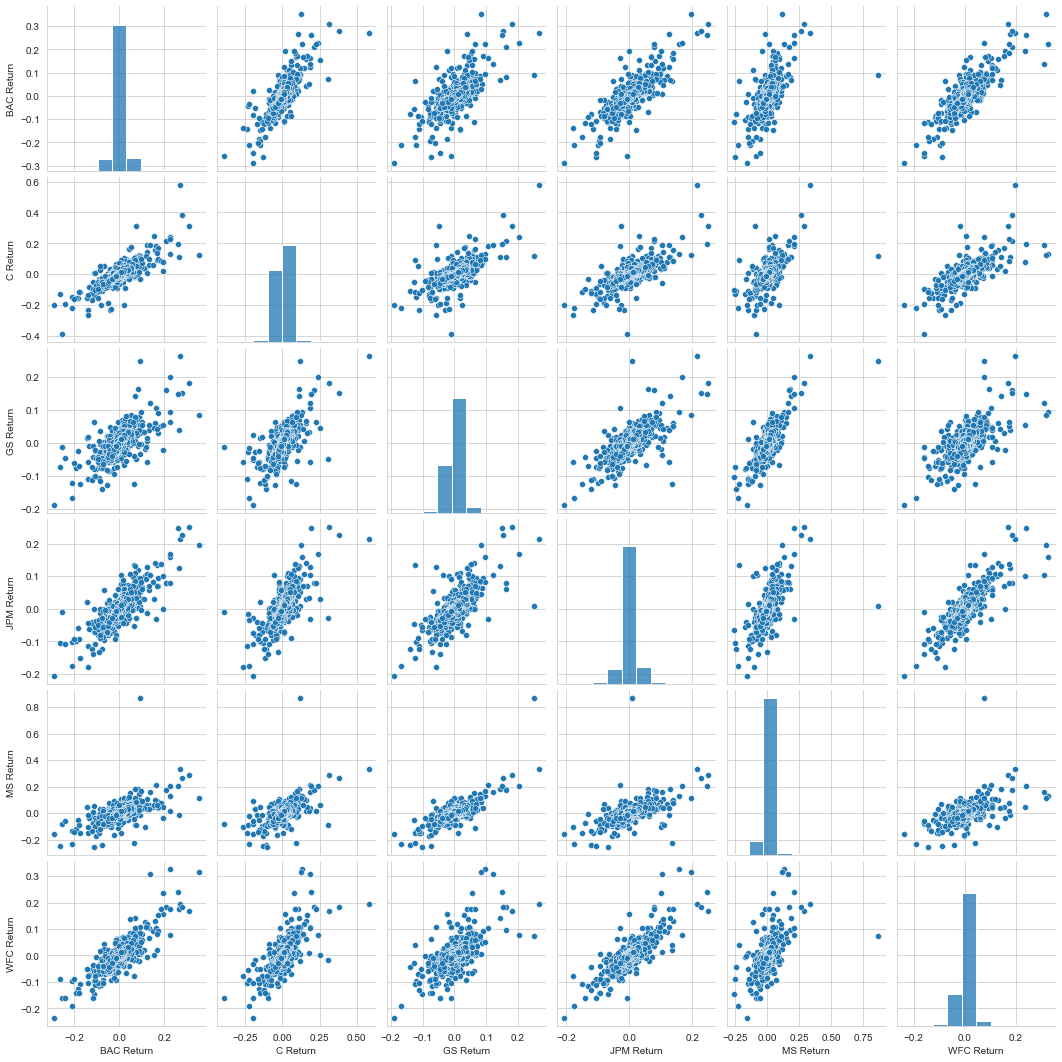

In [16]:
sns.set_style("whitegrid")
sns.pairplot(returns[1:], diag_kind = 'hist', diag_kws = {'bins' : 10})

Using return dataframe figure out on what dates each bank stock had the best & worst single day returns. 

In [17]:
# Date of lowest returns

returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [18]:
# 4 of the bank shares the same day for worst drop. The first inauguration of Barack Obama as 44th president of U.S. took place
#on that day i.e. 2009-01-20 which is the reason for worst drop.

In [19]:
# Date of highest returns

returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

Taking look at standard deviation of returns.

In [20]:
np.std(returns)

BAC Return    0.036640
C Return      0.038664
GS Return     0.025385
JPM Return    0.027662
MS Return     0.037812
WFC Return    0.030232
dtype: float64

Riskiest stock for the year 2015

In [21]:
returns.loc['2015-01-01' : '2015-12-31'].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

In [22]:
# Wells Fargos standard deviation is low, so its the riskiest one

Creating a distribution plot of 2015 returns for Morgan Stanley

<AxesSubplot:xlabel='MS Return', ylabel='Density'>

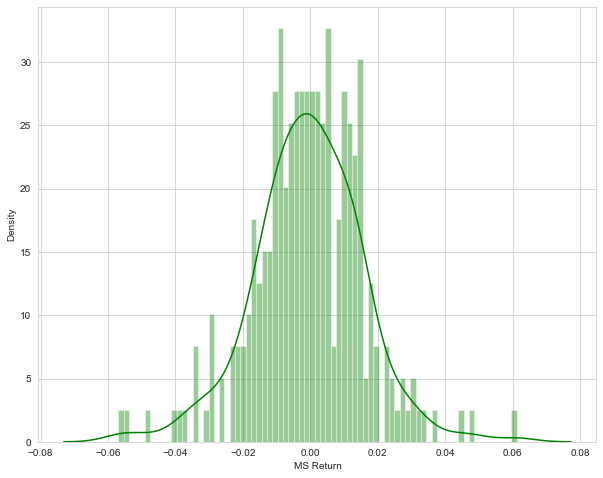

In [23]:
plt.figure(figsize = (10,8))
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'], bins = 75, color = 'green')

In [25]:
# Distribution of 2015 returns of Morgan Stanley is normal with 0.06 standard deviation

Creating a distribution plot of 2008 returns for CitiGroup

<AxesSubplot:xlabel='C Return', ylabel='Density'>

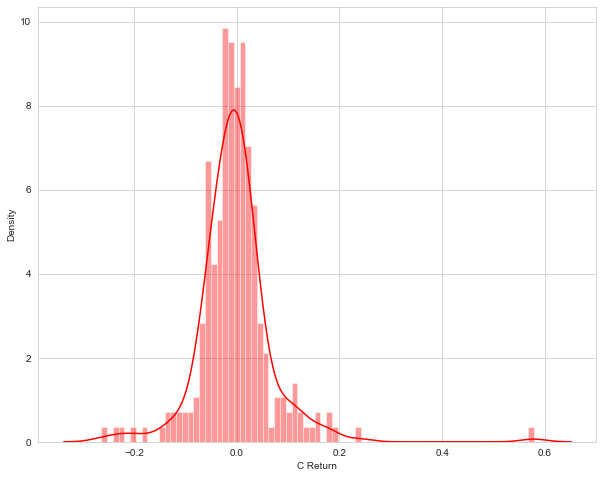

In [26]:
plt.figure(figsize = (10,8))
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['C Return'], bins = 75, color = 'red')

Creating a line plot showing close price for each bank for the entire index of time.

<AxesSubplot:xlabel='Date'>

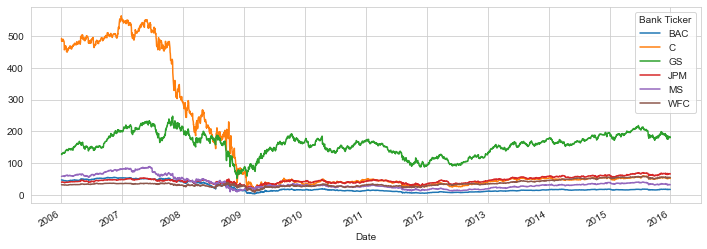

In [30]:
bank_stocks.xs('Close', axis = 1, level = 'Stock Info').plot(figsize = (12,4))

In [32]:
# Using plotly library Creating a interactive line plot showing close price for each bank for the entire index of time.

bank_stocks.xs('Close', axis = 1, level = 'Stock Info').iplot()

### Moving Averages

Lets analyze moving averages for these stocks in year 2008

Plotting rolling 30 day average against the close price for Bank of Americas stock for year 2008

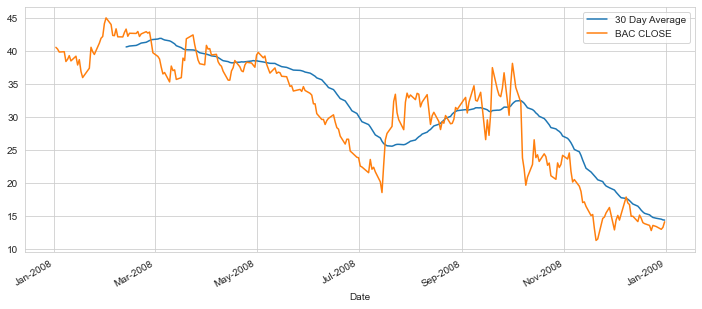

In [33]:
import matplotlib.dates as mdates
fig = plt.figure(figsize = (12,5))
s = fig.add_subplot(111)
s.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
bank_stocks['BAC']['Close'].loc['2008-01-01':'2008-12-31'].rolling(window = 30).mean().plot(label = '30 Day Average')
bank_stocks['BAC']['Close'].loc['2008-01-01':'2008-12-31'].plot(label = 'BAC CLOSE')
plt.legend()

Creating a heatmap of correlation between stocks close price

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

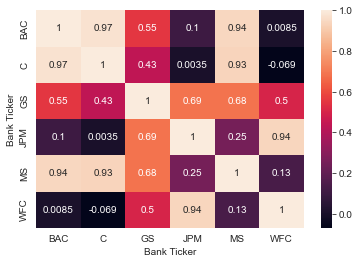

In [34]:
sns.heatmap(bank_stocks.xs('Close', axis = 1, level = 'Stock Info').corr(), annot = True)

Using seaborns clustermap to cluster the correlation together

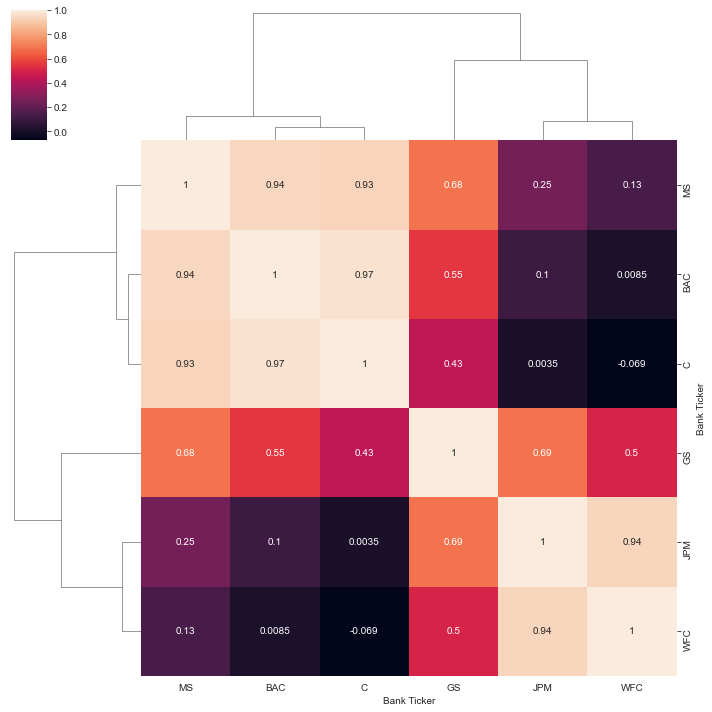

In [35]:
sns.clustermap(bank_stocks.xs('Close', axis = 1, level = 'Stock Info').corr(), annot = True)

Creating a interactive heatmap of correlation using plotly between stocks close price

In [36]:
bank_stocks.xs('Close', axis = 1, level = 'Stock Info').corr().iplot(kind = 'heatmap', colorscale = 'rdylbu')

Creating a candlestick plot for financial analysis for the year 2015 to 2016

In [37]:
bank_stocks['BAC'][['Open', 'High', 'Low', 'Close']].loc['2015-01-01':'2016-01-01'].iplot(kind = 'candle')

Creating technical analysis plot based on moving average of morgan stanley using cufflink library for the year 2015

In [38]:
bank_stocks['MS'][['Close']].loc['2015-01-01':'2015-12-31'].ta_plot(study = 'sma', periods = [13,21,55], title = 'Simple Moving Average')

Creating a technical analysis bollinger band plot for Bank of America for year 2015

In [39]:
bank_stocks['BAC'][['Close']].loc['2015-01-01':'2015-12-31'].ta_plot(study = 'boll', title = 'Bollinger Band Plot')